In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [3]:
data = pd.read_csv('Employee.csv')


In [5]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [13]:
# Step 1: Data Exploration

for col in data.columns:
    print(f"{col}: {data[col].unique()} (Unique Count: {len(data[col].unique())})")



Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (Unique Count: 7)
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (Unique Count: 30)
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (Unique Count: 41)
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (Unique Count: 12)
Country: ['India'] (Unique Count: 1)
Gender: [0 1] (Unique Count: 2)


In [15]:
print(data.describe(include='all'))

       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [19]:
data.rename(columns={'Company': 'company_name',
    'Age': 'age',
    'Salary': 'salary',
    'Place': 'location',
    'Country': 'country',
    'Gender': 'gender'}, inplace=True)

In [21]:
data

,company_name,age,salary,location,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [27]:
# Step 2: Data Cleaning

data['age'] = data['age'].replace(0, np.nan)
data

,company_name,age,salary,location,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [42]:
# Treat missing values


data['age'] = data['age'].fillna(data['age'].mean())
data['salary'] = data['salary'].fillna(data['salary'].mean())
data['location'] = data['location'].fillna(data['location'].mode()[0])
data['company_name'] = data['company_name'].fillna(data['company_name'].mode()[0])

In [44]:
# Remove duplicate rows


data = data.drop_duplicates()

In [46]:
# Identify outliers using IQR


def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

outliers_age = find_outliers('age')
outliers_salary = find_outliers('salary')
print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in Salary: {len(outliers_salary)}")

Outliers in Age: 0
Outliers in Salary: 0


In [48]:
# Step 3: Data Analysis

# Filter data where age > 40 and salary < 5000

filtered_data = data[(data['age'] > 40) & (data['salary'] < 5000)]

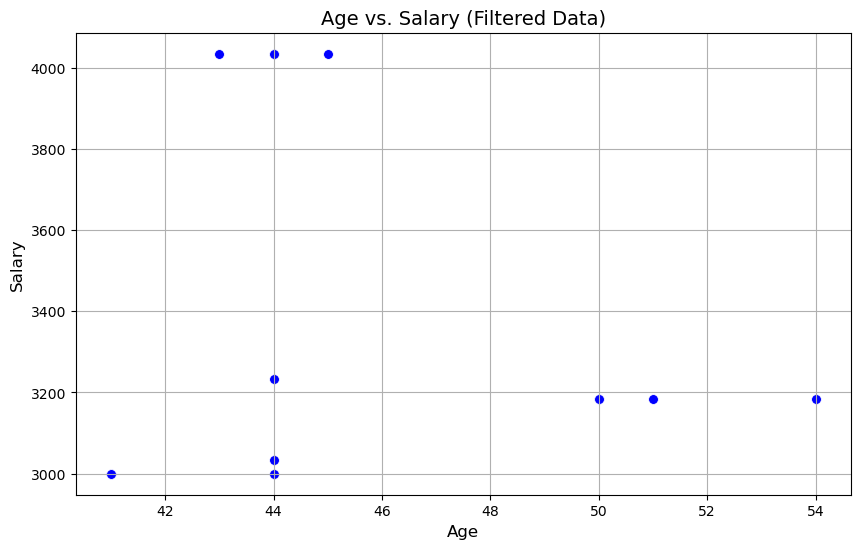

In [50]:
# Plot Age vs Salary


plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='age', y='salary', color='blue', s=50)
plt.title('Age vs. Salary (Filtered Data)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True)
plt.show()


In [52]:
# Count people from each location


location_counts = data['location'].value_counts()

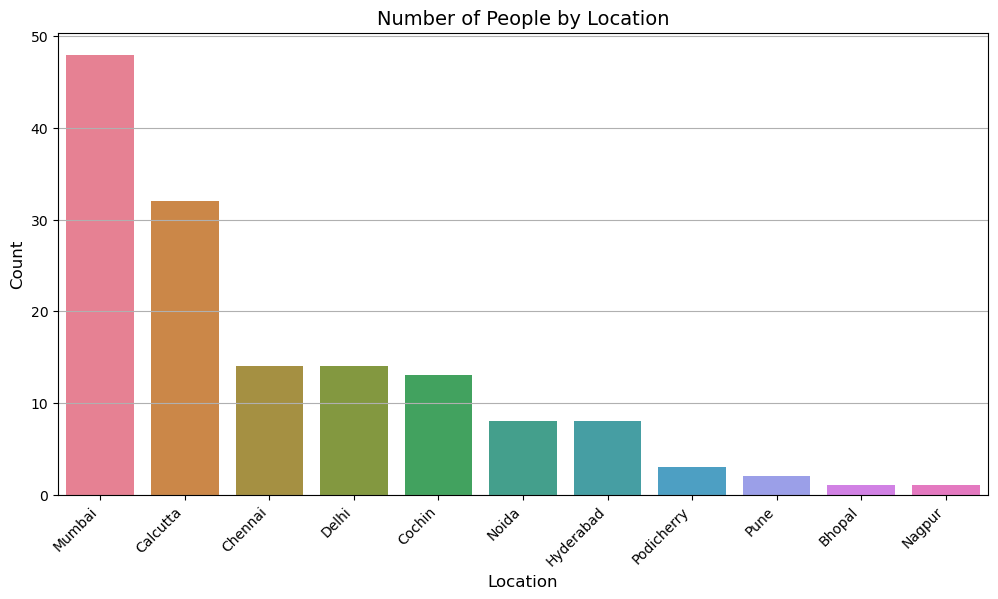

In [56]:
# Plot Location Counts


plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, hue=location_counts.index, dodge=False)
plt.title('Number of People by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)  
plt.grid(axis='y')
plt.show()


In [62]:
# Step 4: Data Encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for 'location'

one_hot_encoder = OneHotEncoder(sparse_output=False) 
encoded_location = one_hot_encoder.fit_transform(data[['location']])
encoded_location_df = pd.DataFrame(encoded_location, columns=one_hot_encoder.get_feature_names_out(['location']))


In [66]:
# Label Encoding for 'gender'


label_encoder = LabelEncoder()
data.loc[:, 'gender_encoded'] = label_encoder.fit_transform(data['gender'])

In [68]:
# Step 5: Feature Scaling


scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()


In [74]:
data.loc[:, 'age_scaled_standard'] = scaler_standard.fit_transform(data[['age']])
data.loc[:, 'salary_scaled_standard'] = scaler_standard.fit_transform(data[['salary']])
data.loc[:, 'age_scaled_minmax'] = scaler_minmax.fit_transform(data[['age']])
data.loc[:, 'salary_scaled_minmax'] = scaler_minmax.fit_transform(data[['salary']])

print("Data preprocessing complete!")

Data preprocessing complete!
